In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

get the data and preprocess it

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('The current size of our dataset is : \nX_train -> ',X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' , X_test.shape,'\ny_test' , y_test.shape )


The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [4]:
def plot_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

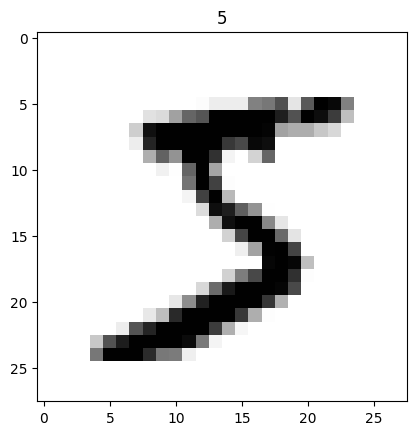

In [5]:
for i in range(1):
    plot_img(i)

preprocessing images

In [6]:
# Normalizing the image
'''
Converts pixel values from 0-255 (uint8) to 0.0-1.0 (float32).
This helps neural networks train faster and more accurately.
'''
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255
print(len(X_train))

# expand the dimension to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

60000


In [7]:
# we have converted our class to one hot vector 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

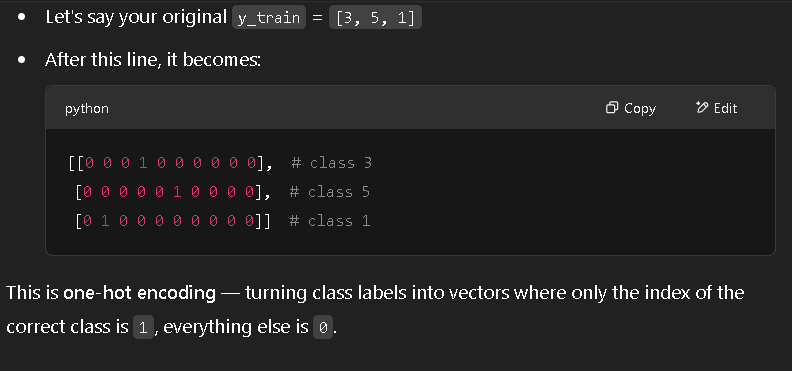

buidling the model

In [8]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = 'relu' ))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu' ))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


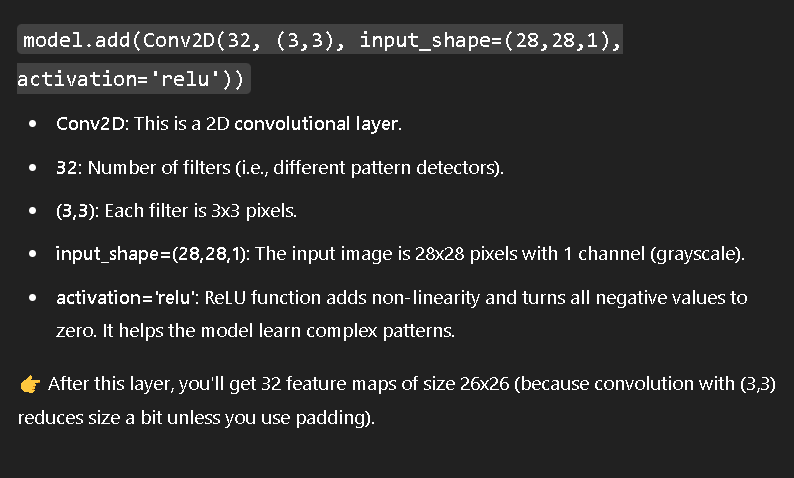
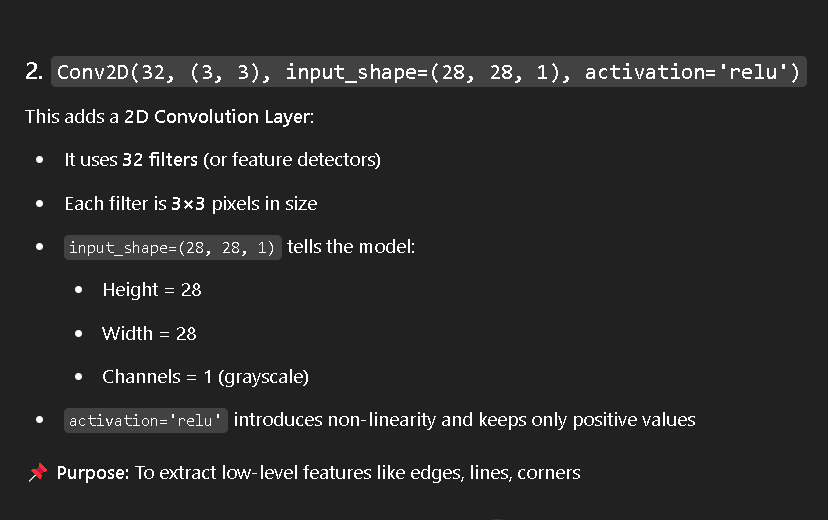
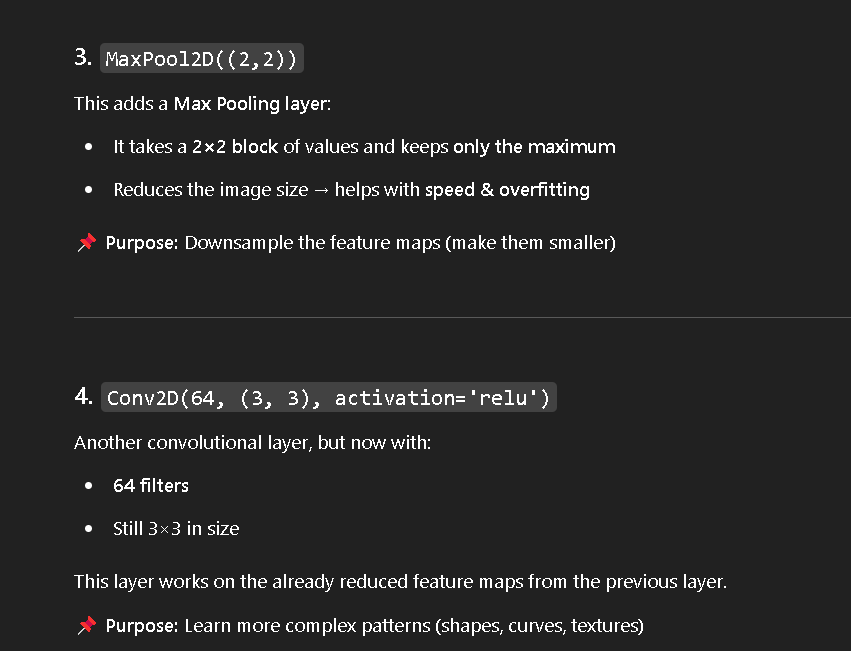
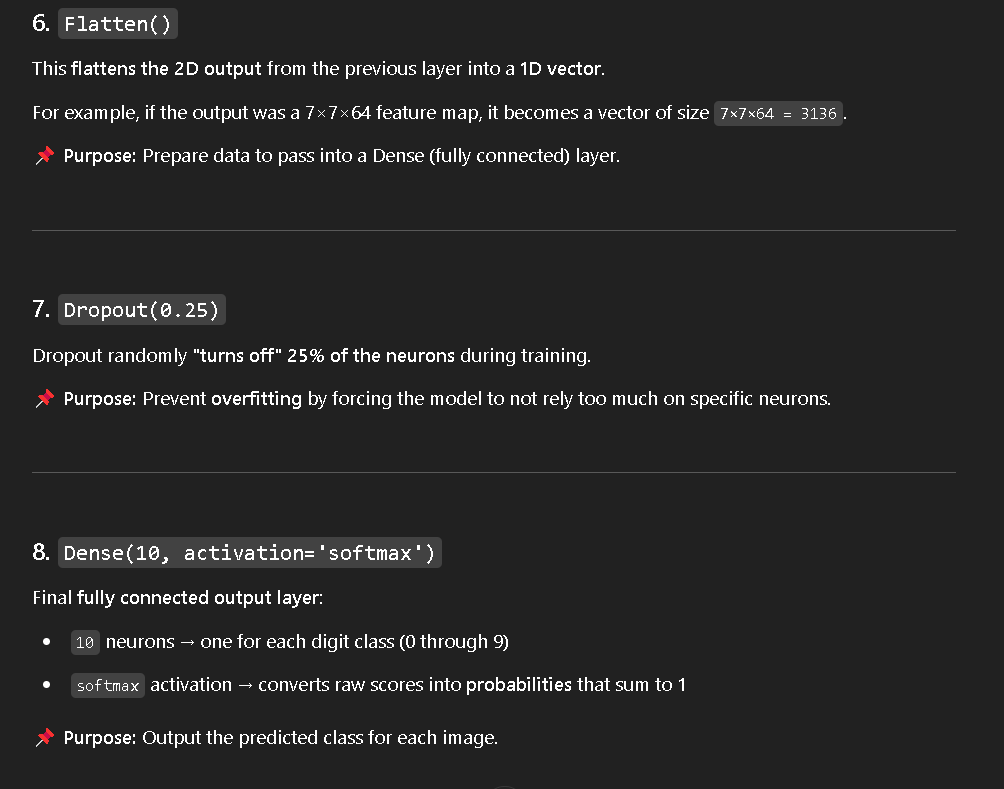
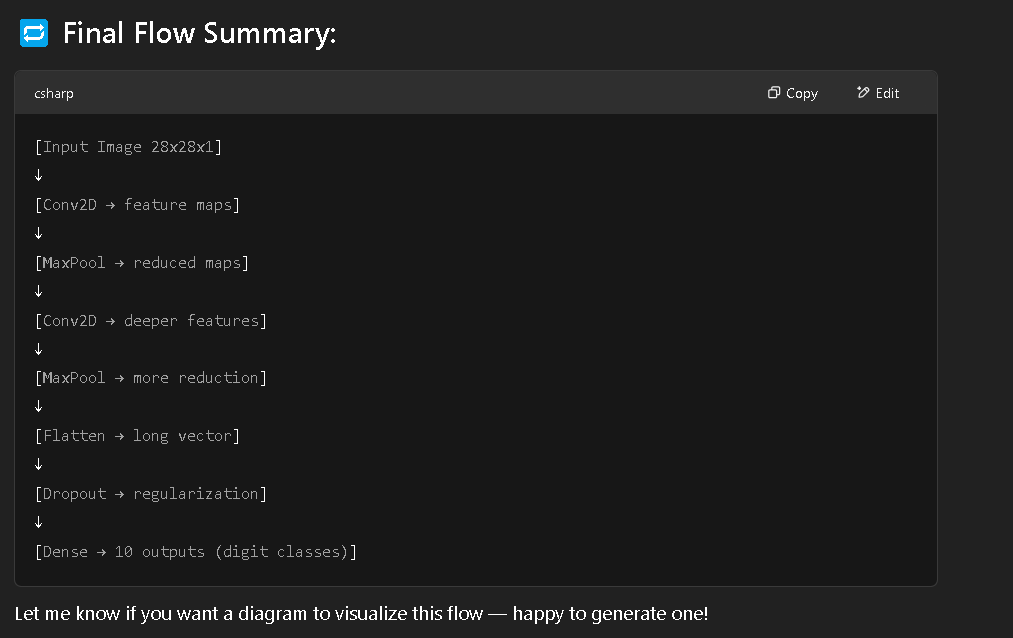
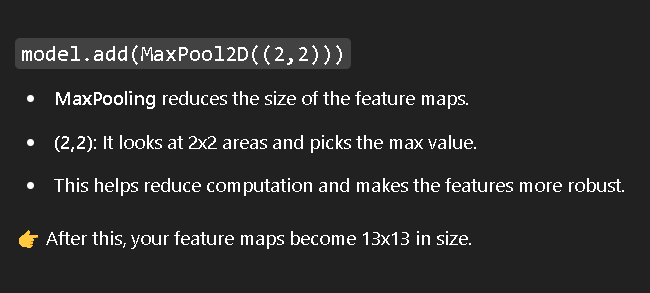
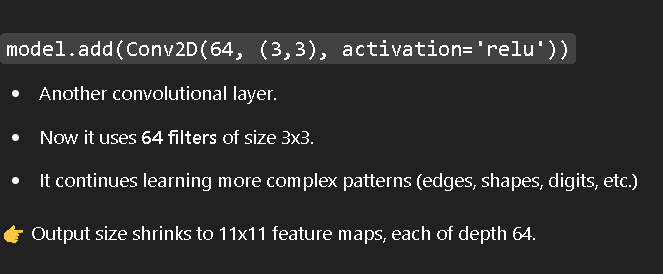
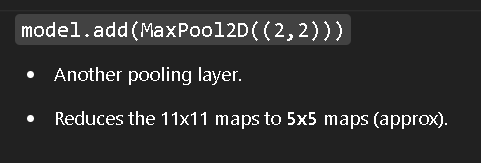
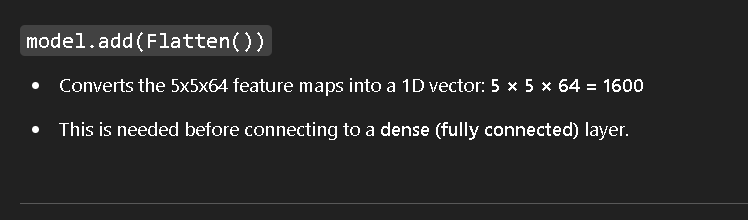
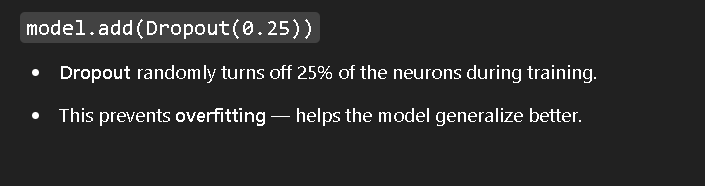
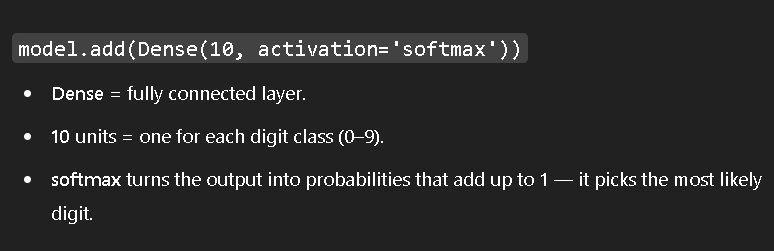

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

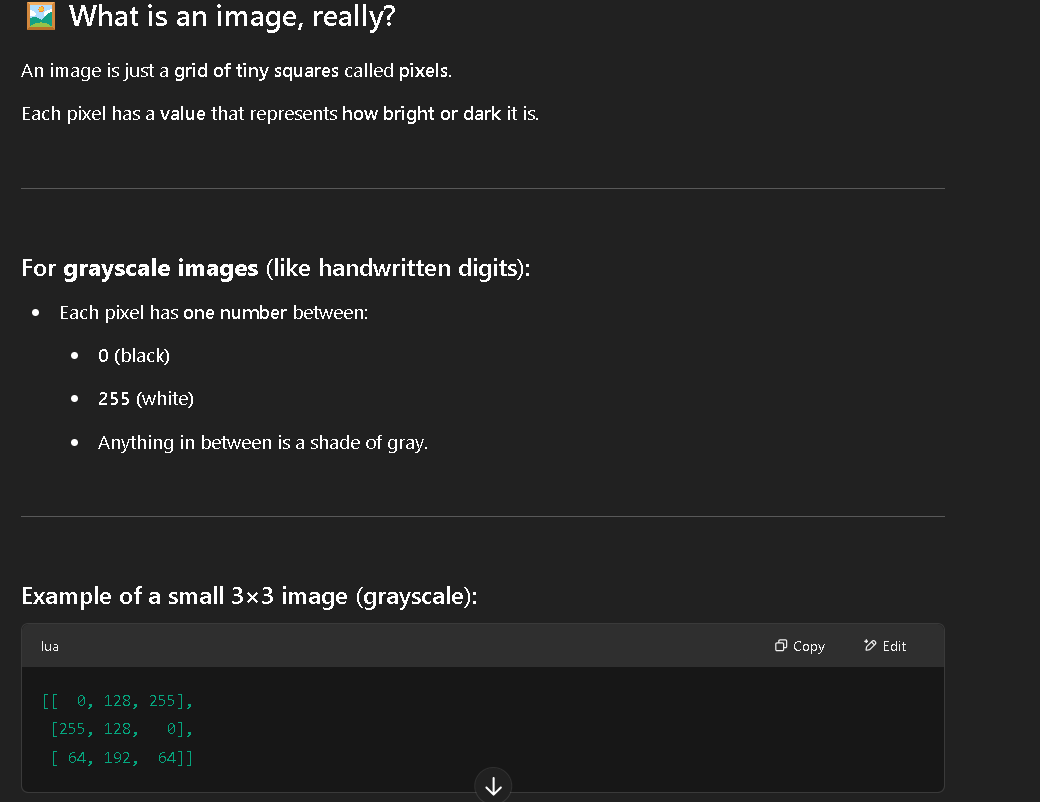
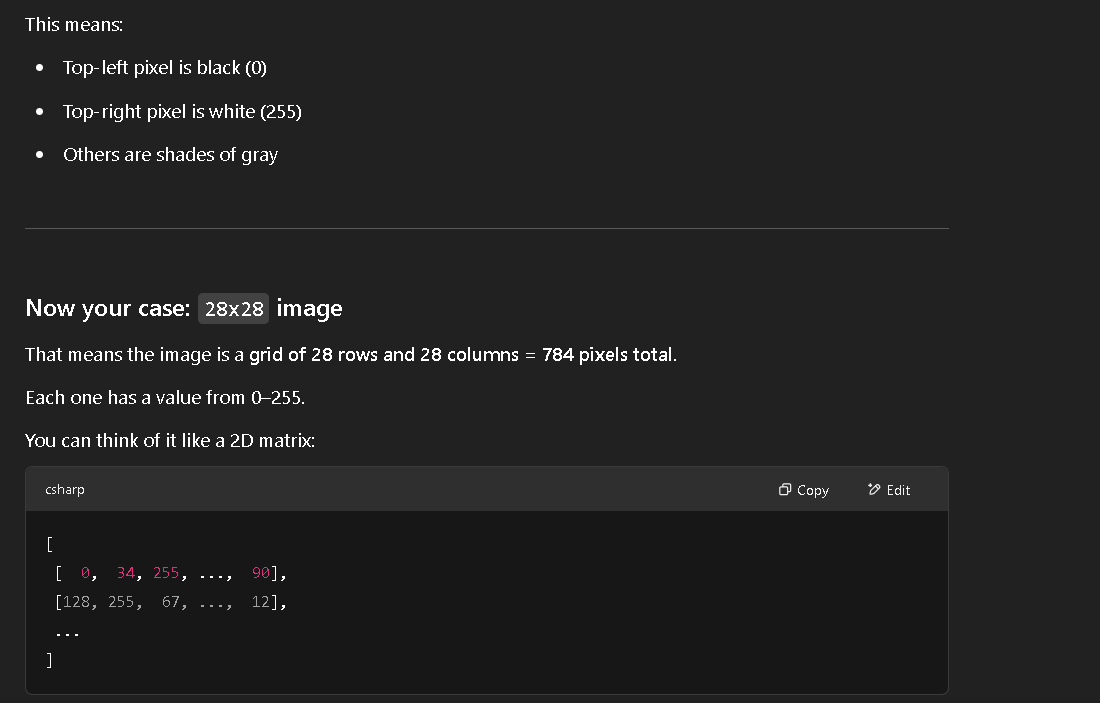
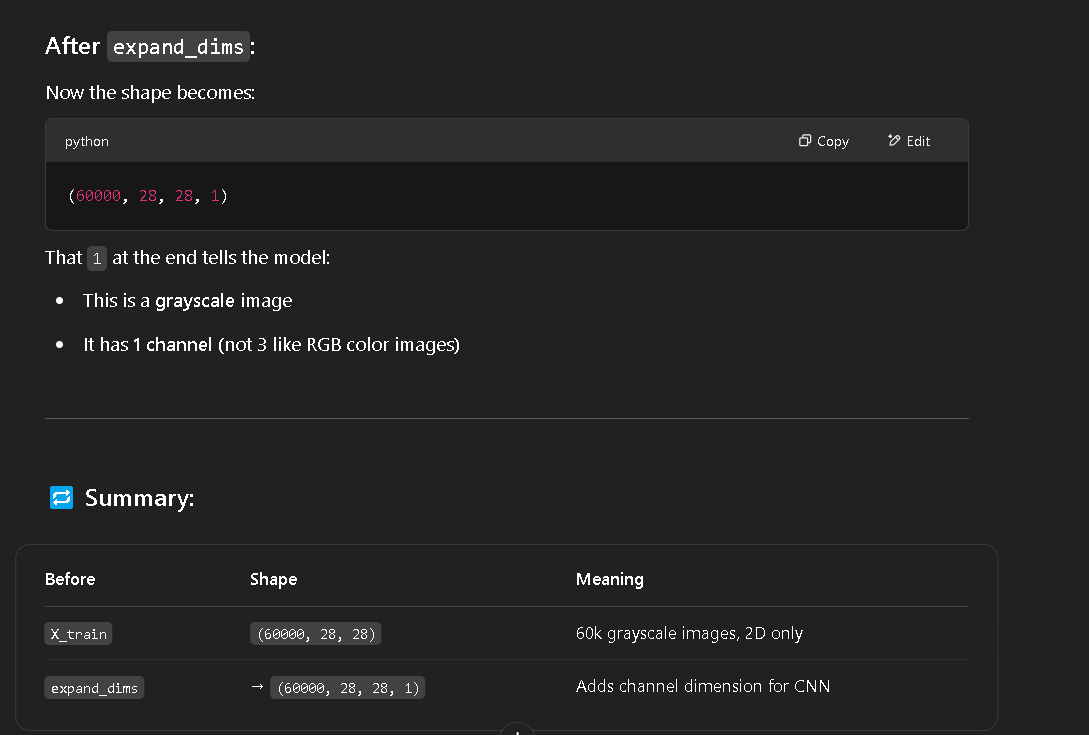
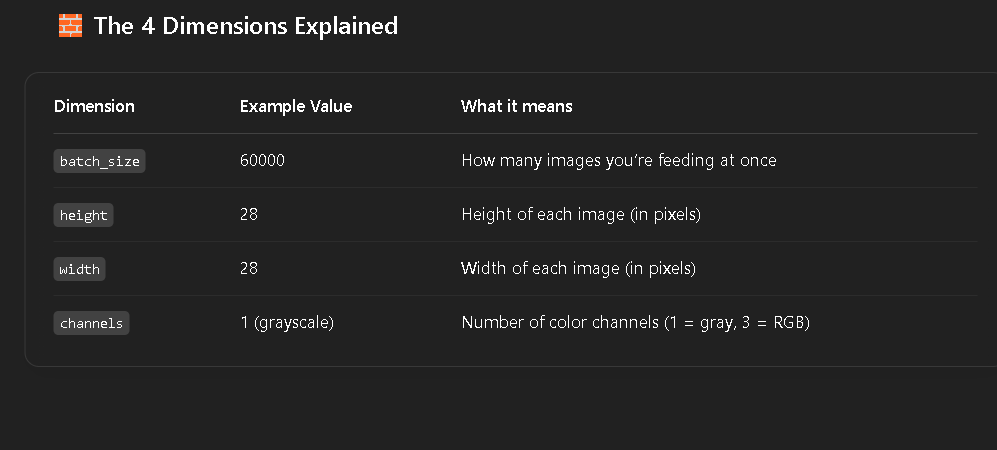
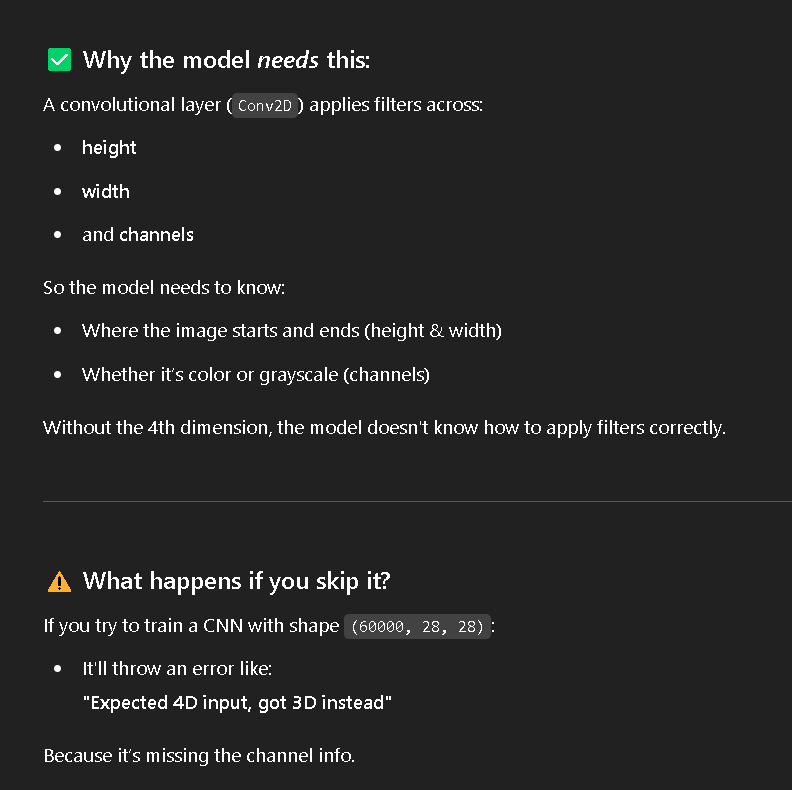
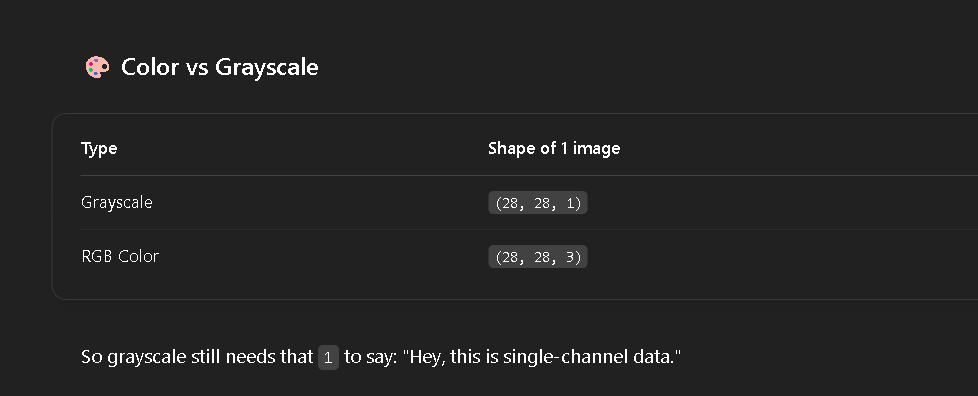

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

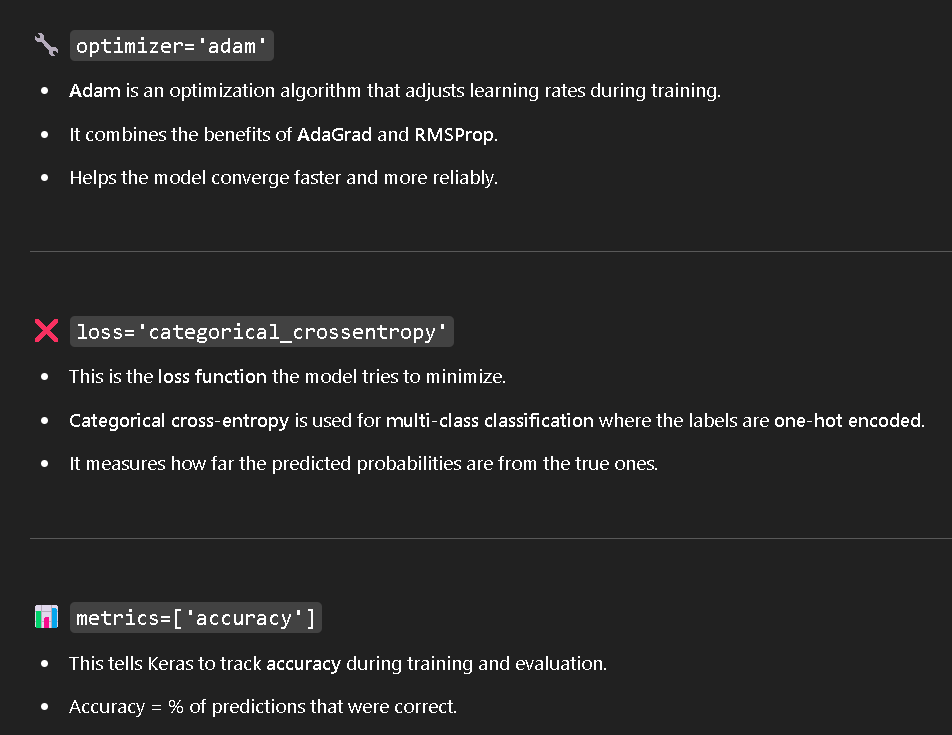

In [11]:
# calllbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystopping

es = EarlyStopping(monitor = 'val_accuracy',min_delta = 0.01 , patience = 4 ,verbose =1)

# model checkpoint

mc = ModelCheckpoint(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5',monitor = 'val_accuracy',verbose   =1 , save_best_only  = True)

cb = [es,mc]

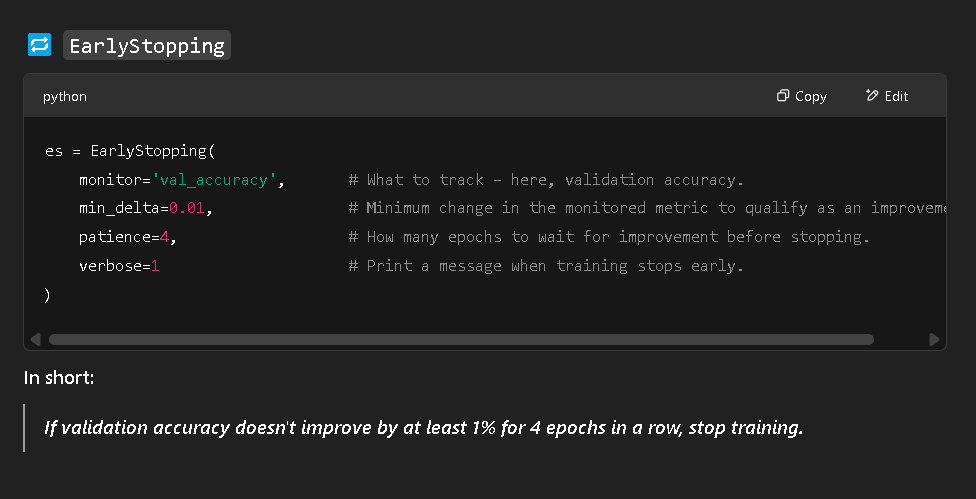
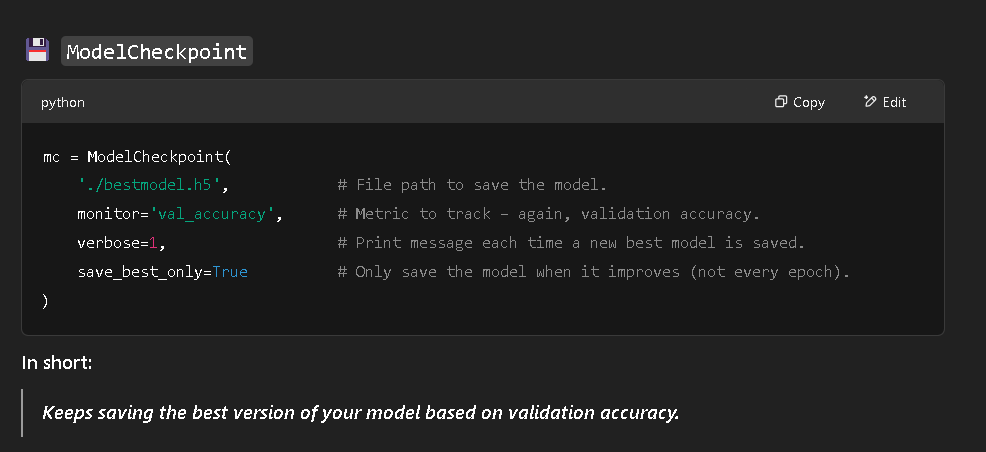

Model Training

In [12]:
#his = model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=cb)

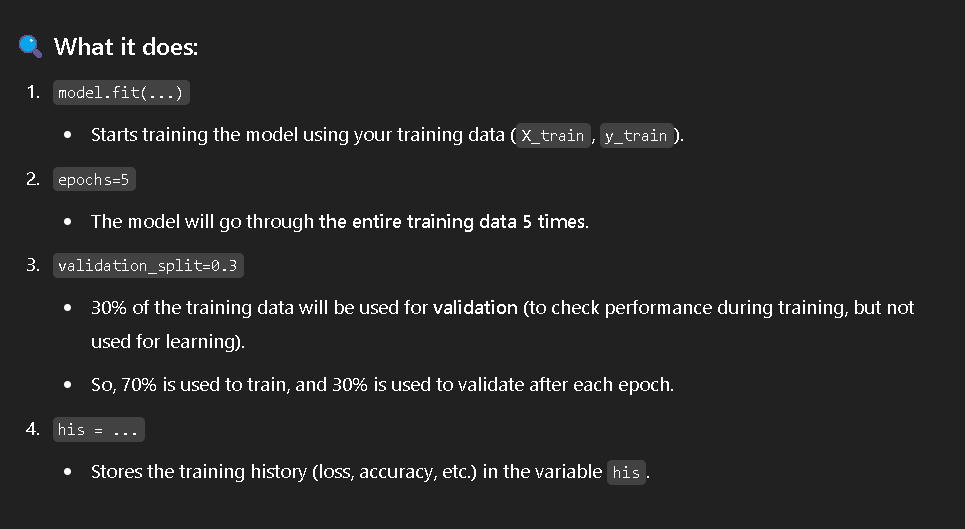

In [13]:
model_S = keras.models.load_model(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\\ML\\project\\image_recog_mnist\bestmodel.h5')

In [14]:
score = model_S.evaluate(X_test,y_test)
# 0 returns the loss
print(f'mode accuracy is {score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9851 - loss: 0.0451
mode accuracy is 0.9878000020980835


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
X_test_flat shape: (10000, 784)
y_test_int shape: (10000,)


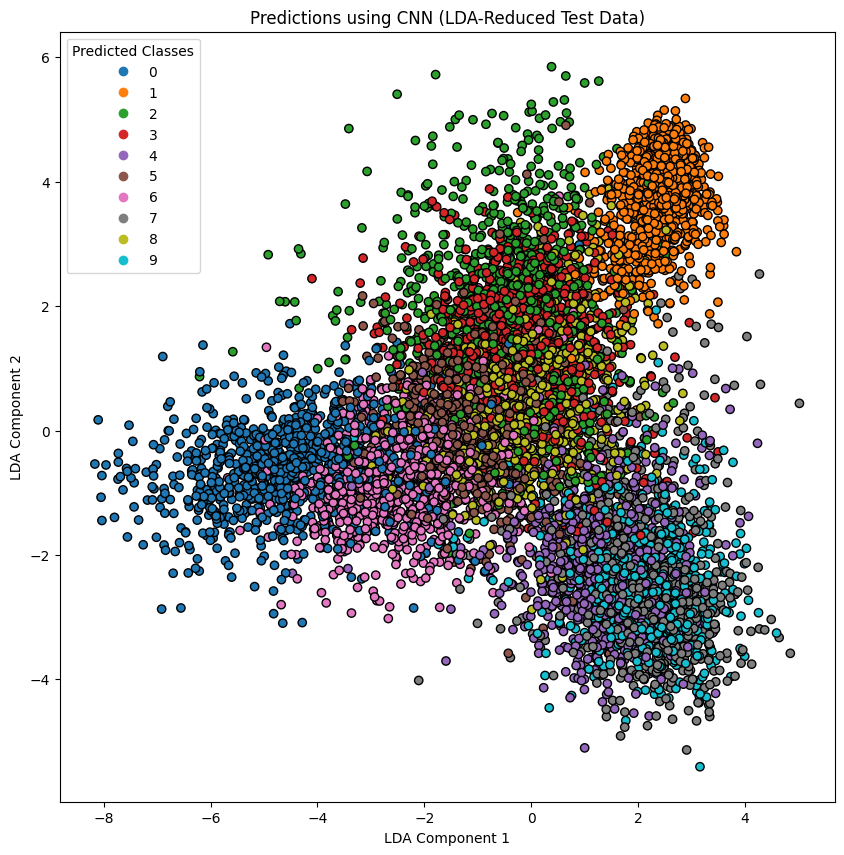

'\nThe CNN model achieves a high training accuracy of around 99.33% and a \nvalidation accuracy of 98.87% by the final epoch, indicating strong \nperformance on the MNIST dataset. The model effectively learns to \ndistinguish between digits, with validation loss stabilizing around 0.0406.\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model_S = load_model(r'F:\AMRITA ALL SEMESTER\SEMESTER-4\ML\project\image_recog_mnist\bestmodel.h5')
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

X_test_flat = X_test.reshape(X_test.shape[0], -1)  
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_pred = model_S.predict(X_test)

y_test_int = np.argmax(y_test_one_hot, axis=1) 

print("X_test_flat shape:", X_test_flat.shape)  
print("y_test_int shape:", y_test_int.shape)   

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_flat, y_test_int)  

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (LDA-Reduced Test Data)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()


'''
The CNN model achieves a high training accuracy of around 99.33% and a 
validation accuracy of 98.87% by the final epoch, indicating strong 
performance on the MNIST dataset. The model effectively learns to 
distinguish between digits, with validation loss stabilizing around 0.0406.
'''

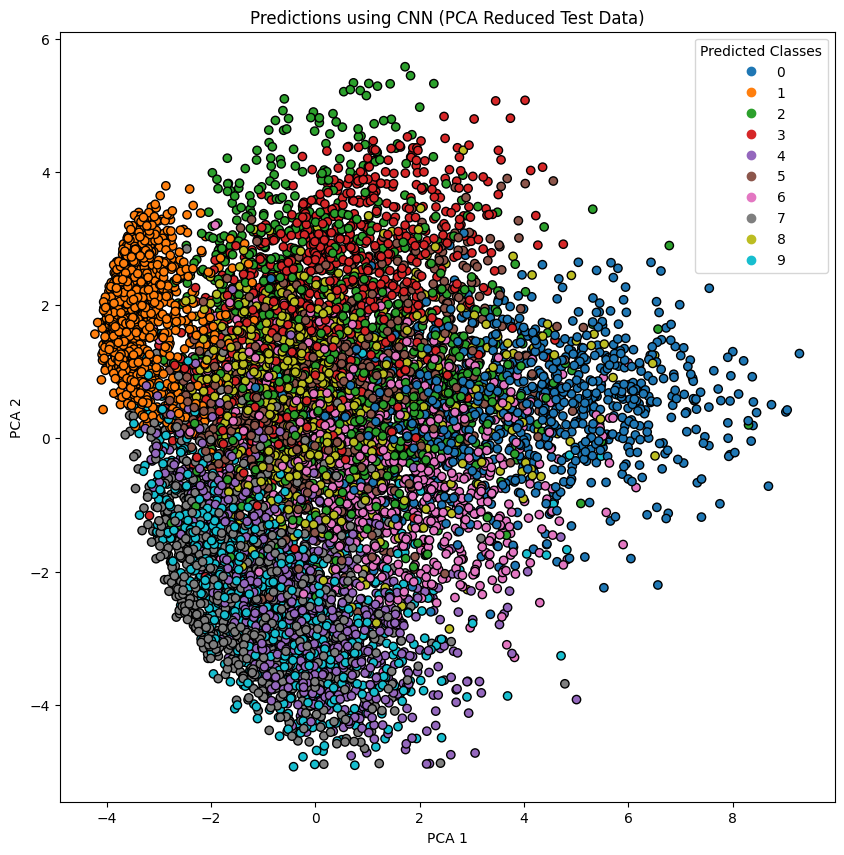

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_flat, y_test_int)  
X_reduced_subset = X_reduced[:1000]
y_pred_subset = y_pred[:1000]
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (PCA Reduced Test Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


C:\Users\anshb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


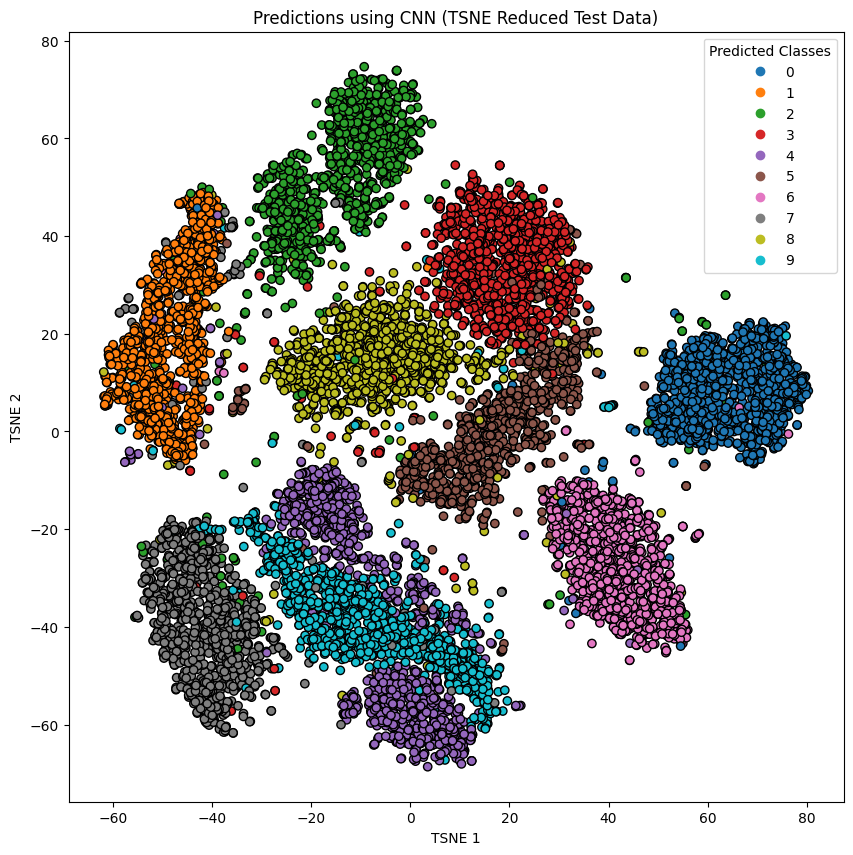

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000)
X_reduced = tsne.fit_transform(X_test_flat, y_test_int)  
X_reduced_subset = X_reduced[:1000]
y_pred_subset = y_pred[:1000]
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred.argmax(axis=1), cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted Classes")
plt.title("Predictions using CNN (TSNE Reduced Test Data)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()
